from [https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b]

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import pathlib
import PIL
import os
import time



from __future__ import print_function
import time
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


from datetime import datetime
from packaging import version

import matplotlib.pyplot as plt
import matplotlib
#set fonts to display labels correctly
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'MS Gothic'
    }
)

610236


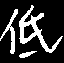

In [2]:
data_dir = pathlib.Path('Data/characters/')

image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

low = list(data_dir.glob('低/*'))
PIL.Image.open(str(low[0]))

In [3]:
batch_size = 201
img_height = 63
img_width = 64

In [4]:
seed = 1234

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale',
  shuffle=False)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale',
  shuffle=False)


class_names = train_ds.class_names
#print(class_names)

#Normalize the data

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

Found 610236 files belonging to 3036 classes.
Using 488189 files for training.
Found 610236 files belonging to 3036 classes.
Using 122047 files for validation.


In [5]:
take = train_ds.take(100)
take = take.unbatch()


images = []
labels = []

for image, label in take:
    images.append(image.numpy().astype("uint8"))
    labels.append(class_names[label.numpy()])


del take

print(f'Num: {len(labels) / 201} ({len(labels)})')


Num: 100.0 (20100)


In [6]:
#plt.figure(figsize=(10, 10))

print(np.shape(images))
reshape = np.reshape(images, (len(images), 64 * 63))
print(np.shape(reshape))

'''
mul = 201 * 99
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + mul])
    plt.title(labels[i + mul])
    plt.axis("off")
'''

(20100, 63, 64, 1)
(20100, 4032)


'\nmul = 201 * 99\nfor i in range(9):\n    ax = plt.subplot(3, 3, i + 1)\n    plt.imshow(images[i + mul])\n    plt.title(labels[i + mul])\n    plt.axis("off")\n'

In [7]:
y = labels
X = reshape

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (20100, 4034)


In [8]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.0384541  0.03280419 0.02765549]


In [9]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [10]:
'''
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    #palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)
'''

'\nplt.figure(figsize=(16,10))\nsns.scatterplot(\n    x="pca-one", y="pca-two",\n    hue="y",\n    #palette=sns.color_palette("hls", 10),\n    data=df.loc[rndperm,:],\n    legend="full",\n    alpha=0.3\n)\n'

In [11]:
N = 10000 * 10
df_subset = df.loc[rndperm[:N],:].copy()


data_subset = df_subset[feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.0384541  0.0328042  0.02765547]


In [12]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20100 samples in 0.052s...
[t-SNE] Computed neighbors for 20100 samples in 22.508s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20100
[t-SNE] Computed conditional probabilities for sample 2000 / 20100
[t-SNE] Computed conditional probabilities for sample 3000 / 20100
[t-SNE] Computed conditional probabilities for sample 4000 / 20100
[t-SNE] Computed conditional probabilities for sample 5000 / 20100
[t-SNE] Computed conditional probabilities for sample 6000 / 20100
[t-SNE] Computed conditional probabilities for sample 7000 / 20100
[t-SNE] Computed conditional probabilities for sample 8000 / 20100
[t-SNE] Computed conditional probabilities for sample 9000 / 20100
[t-SNE] Computed conditional probabilities for sample 10000 / 20100
[t-SNE] Computed conditional probabilities for sample 11000 / 20100
[t-SNE] Computed conditional probabilities for sample 12000 / 20100
[t-SNE] Computed conditional probabilities for s

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

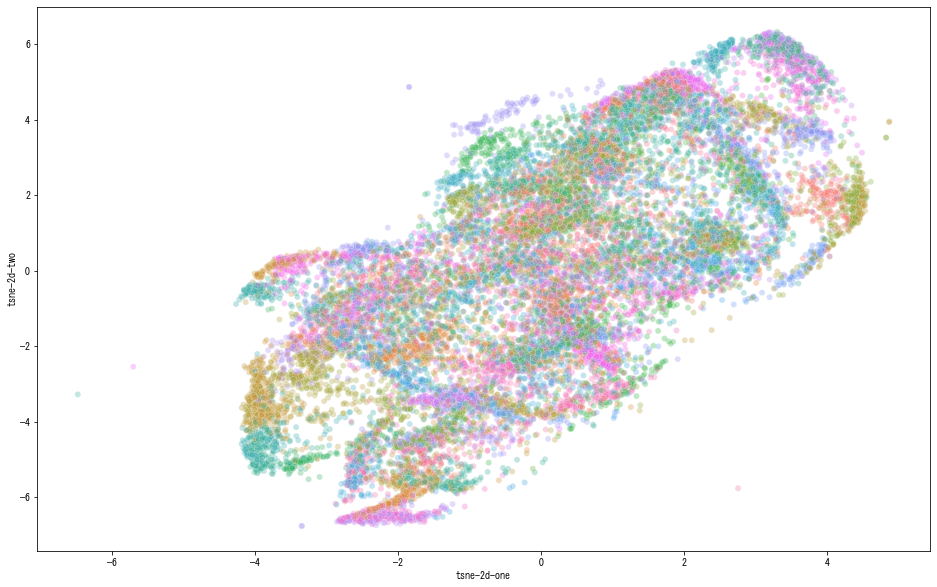

In [13]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    #palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend=False,
    alpha=0.3
)